In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Student_performance_data.csv')

## EDA

#### Пропуски и дубли

Посмотрим на пропуски:

In [8]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

и на дубли:

In [9]:
df.duplicated().sum()

np.int64(0)

Ни пропусков, ни дублей нет.

#### Нормализация данных

In [2]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


Видим, что данные не нормализованы. Исправим это:

In [3]:
df = df.drop('StudentID', axis = 1) #этот столбец не пригодится при обучении

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(df)
df_std = pd.DataFrame(X_std, columns = df.columns)

In [15]:
df_std.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03
mean,8.406505e-16,-1.440691e-16,-7.129191e-17,4.455745e-17,1.173346e-16,8.911489e-18,-2.970496e-17,-1.336723e-17,4.232957e-17,-4.158695e-17,-4.010170e-17,-8.465915e-17,4.381482e-17,-1.782298e-17
std,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00
min,-1.307132e+00,-1.021981e+00,-8.533909e-01,-1.745885e+00,-1.728882e+00,-1.717694e+00,-6.568700e-01,-1.890357e+00,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-2.083345e+00,-2.418592e+00
25%,-1.307132e+00,-1.021981e+00,-8.533909e-01,-7.460868e-01,-8.367399e-01,-8.908224e-01,-6.568700e-01,-9.995505e-01,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-7.993565e-01,-7.973866e-01
50%,-4.171064e-01,9.784921e-01,-8.533909e-01,2.537113e-01,-1.178937e-02,5.417330e-02,-6.568700e-01,-1.087439e-01,-7.884763e-01,-6.601320e-01,-4.951614e-01,-4.318656e-01,-1.398263e-02,8.238193e-01
75%,4.729190e-01,9.784921e-01,1.091641e+00,2.537113e-01,8.203737e-01,8.810445e-01,1.522371e+00,7.820626e-01,1.268269e+00,1.514848e+00,-4.951614e-01,-4.318656e-01,7.825767e-01,8.238193e-01
max,1.362944e+00,9.784921e-01,2.064157e+00,2.253308e+00,1.805881e+00,1.707916e+00,1.522371e+00,1.672869e+00,1.268269e+00,1.514848e+00,2.019544e+00,2.315535e+00,2.288410e+00,8.238193e-01


Теперь mean ≈ 0, std ≈ 1

#### Сбалансированность данных

In [28]:
mx_cat = df_std['GradeClass'].value_counts().idxmax()
mn_cat = df_std['GradeClass'].value_counts().idxmin()
1 - df_std['GradeClass'].value_counts()[mn_cat] / df_std['GradeClass'].value_counts()[mx_cat]

np.float64(0.911643270024773)

Получили, что разница между самым маленьким и большим классом составляет 90%. Это означает, что данные несбалансированны. Об этом важно будет помнить при обучении модели. 

#### Матрица корреляций

<Axes: >

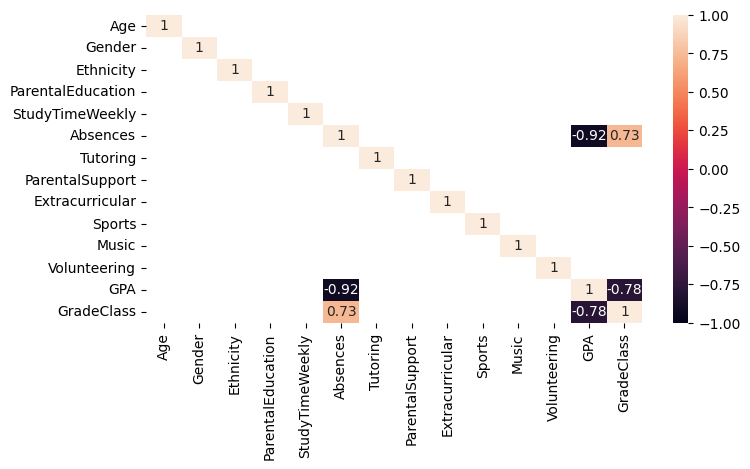

In [ ]:
corr = df_std.corr()
mask = (-0.2 < corr) & (corr < 0.2)

plt.figure(figsize = (8, 4))
sns.heatmap(corr, vmax=1, mask = mask, vmin=-1, annot=True)

#### еще что-то

мб надо делать все это отдельная для train и для test?